# Titanic Survival Prediction 

# Overview 
The Titanic dataset contains data about the passengers who were on board the Titanic. Our goal is to build a predictive model that answers the question: "What sorts of people were more likely to survive?" using passenger data such as age, sex, class, etc.



In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Data Exploration 
train_data.info()
train_data.describe()
train_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

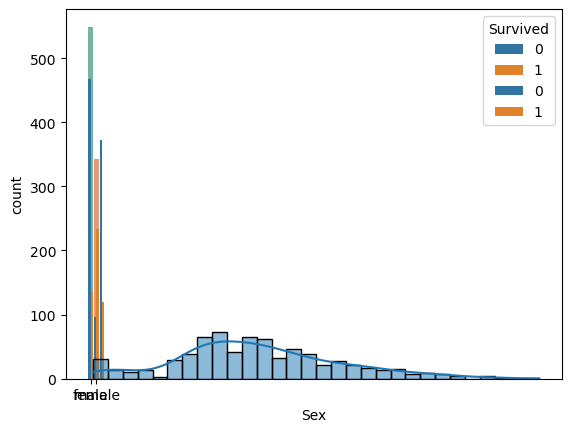

In [4]:
# Visualize the Data 
sns.countplot(x='Survived', data=train_data, palette='Set2')
sns.countplot(x='Pclass', hue='Survived', data=train_data)
sns.countplot(x='Sex', hue='Survived', data=train_data)
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.show()


In [5]:
# Fill missing Age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill Fare in test set
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Drop Cabin (too many missing)
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

# Drop Ticket and Name (less useful)
train_data.drop(['Ticket', 'Name'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Name'], axis=1, inplace=True)

# Encode categorical features
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_data[col] = label.fit_transform(train_data[col])
    test_data[col] = label.transform(test_data[col])


In [6]:
#Split the Data
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



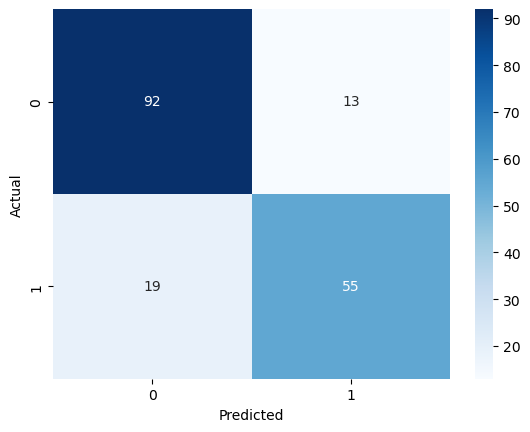

In [8]:
#Evaluate the Model
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
# Final Predictions on Test Set
test_X = test_data.drop(['PassengerId'], axis=1)
test_predictions = model.predict(test_X)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('titanic_submission.csv', index=False)

